In [17]:
import numpy as np
import pandas as pd
from pathlib import Path
import gzip
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import time, os
from IPython.display import clear_output

## Paths..

In [18]:
data_path = Path("../../data/hand-writing/")
train_path = data_path / "train-images-idx3-ubyte.gz"
train_labels_path = data_path / "train-labels-idx1-ubyte.gz"
test_path = data_path / "t10k-images-idx3-ubyte.gz"
test_labels_path = data_path / "t10k-labels-idx1-ubyte.gz"

# gzip.open(train_labels_path, "r")

## function to read this dataset

In [19]:
def read_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True,image_size=28):
    f_images = gzip.open(images_path, 'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path, 'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)

    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]

    images = images.reshape(num_images, image_size * image_size)

    return images, labels


## Split train, test

In [20]:
train_images, train_labels = read_mnist_data(train_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = read_mnist_data(test_path, test_labels_path, 10000, _is=False, shuffle=True)

print(train_images.shape)
print(test_labels.shape)

/tmp/ipykernel_177175/4150913970.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784)
(10000,)


## Get image from matrix

In [21]:
def get_image(image):
    return image.reshape(28, 28)

## Test read images

In [24]:
def test_read_img(images):
    i = 0
    random_indexes = np.arange(images.shape[0])
    np.random.shuffle(random_indexes)

    while (i<=100):
        temp = get_image(images[random_indexes[i]])
        plt.imshow(temp)
        plt.show()

        i += 1
        time.sleep(0.05)
        clear_output(wait=True)
        

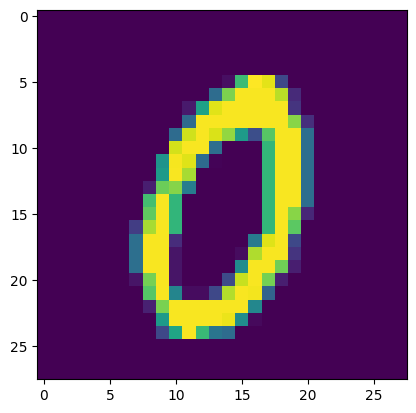

In [25]:
test_read_img(train_images)

## max_iter = 5000 => 10m 

In [ ]:
model = LogisticRegression(multi_class="multinomial", max_iter=1000, solver="sag")
model.fit(train_images, train_labels)

/home/minhanthongminh/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag')

In [ ]:
predict_images = model.predict(test_images)
predict_images.shape

(10000,)

In [ ]:
acc = accuracy_score(test_labels, predict_images)
cm = confusion_matrix(test_labels, predict_images)

print(acc)
print(cm)

0.8636
[[ 943    0    7    1    0   26    9    4    1    0]
 [   0 1016    6    8    0    3    3    0   21    0]
 [  12   15  818   45    6   12    9   12   47    3]
 [  13    3   42  854    1   66    3   20   27   13]
 [   9    5   17    7  911    9   17    7   14   52]
 [  13    5   11   62   15  735   22    9   31   12]
 [  16    1   29    4   25   25  882    2    2    0]
 [   1    7   42   26   14    0    0  883    6   40]
 [   2   12   19   55   12   76    8    9  709   22]
 [   7    8    3   13   44   16    2   42   19  885]]
